# Feature selection methods in sklearn
Filippo Fantinato 2041620

On this notebook I experienced with the following feature selection methods: Variance Threshold, Select K best features, Recursive Feature Elimination and Sequential Feature Selection. The dataset I used is Diamonds, a dataset available in the seaborn module, and our aim is to predict the type of cut to perform on a diamond.

The article where I found out those methods is the following: https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172. Although, the article stopped when the columns to keep were discovered, so I added the part where the cleaned datasets are evaluated on a KNN classifier to see the benefits, in term of accuracy, brought by each methods. 

Moreover, the article's used a different dataset from the one exploited by me.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


First of all let's convert any categorical field into a numerical one

In [ ]:
cut_categories = set(diamonds['cut'].to_list())
cut_categories

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

In [ ]:
color_categories = set(diamonds['color'].to_list())
color_categories

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [ ]:
clarity_categories = set(diamonds['clarity'].to_list())
clarity_categories

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [ ]:
{cut_c: i for i, cut_c in enumerate(cut_categories)}

{'Premium': 0, 'Fair': 1, 'Very Good': 2, 'Good': 3, 'Ideal': 4}

In [ ]:
{color_c: i for i, color_c in enumerate(color_categories)}

{'I': 0, 'E': 1, 'H': 2, 'F': 3, 'J': 4, 'G': 5, 'D': 6}

In [ ]:
{clarity_c: i for i, clarity_c in enumerate(clarity_categories)}

{'SI1': 0,
 'VVS2': 1,
 'VS2': 2,
 'IF': 3,
 'SI2': 4,
 'VVS1': 5,
 'VS1': 6,
 'I1': 7}

In [ ]:
diamonds = diamonds.replace({
    "cut":      {cut_c: i for i, cut_c in enumerate(cut_categories)},
    "color":    {color_c: i for i, color_c in enumerate(color_categories)},
    "clarity":  {clarity_c: i for i, clarity_c in enumerate(clarity_categories)}
  })
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,0,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,4,4,63.3,58.0,335,4.34,4.35,2.75


and see whether there are Null values or not (luckily there is no Null values).

In [ ]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Here below you can find some useful methods:
- **split_dataset**: which splits the dataset according to the column to predict;
- **svm_evaluation**: which evaluates the dataset on a SVM model;
- **knn_evaluation**: which evaluates the dataset on a KNN model with 5 neighbors.

In [ ]:
def split_dataset(df):
  X = df.drop(['cut'], axis = 1)
  y = df['cut']
  return X, y

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def knn_evaluation(X_train, X_test, y_train, y_test):
  knn_model = KNeighborsClassifier(n_neighbors=5)
  knn_model.fit(X_train, y_train)
  y_predicted = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_predicted)

  return accuracy

## No feature selection

Let's see the accuracy obtained on the dirty dataset.

In [ ]:
no_fs_acc = knn_evaluation(*train_test_split(*split_dataset(diamonds), test_size=0.20, random_state=42))
print("No feature selection accuracy:", no_fs_acc)

No feature selection accuracy: 0.510845383759733


## Variance Threshold

In [ ]:
diamonds_vt = diamonds.copy()
diamonds_vt.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,0,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,4,4,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.preprocessing import StandardScaler

X_vt, y_vt = split_dataset(diamonds_vt)

scaler = StandardScaler()
X_vt = pd.DataFrame(scaler.fit_transform(X_vt), columns = X_vt.columns)
X_vt.head()

,carat,color,clarity,depth,table,price,x,y,z
0,-1.198168,-1.040179,0.611742,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.040179,-1.233129,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.040179,1.534177,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,-1.552888,-0.310693,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,0.497947,0.611742,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt_selector = VarianceThreshold(1)
vt_selector.fit(X_vt)
X_vt.columns[vt_selector.get_support()]

Index(['table', 'y', 'z'], dtype='object')

In [ ]:
columns = X_vt.columns[np.logical_not(vt_selector.get_support())]
X_vt = X_vt.drop(np.array(columns), axis = 1)
X_vt.head()

,table,y,z
0,-1.099672,-1.536196,-1.571129
1,1.585529,-1.658774,-1.741175
2,3.375663,-1.457395,-1.741175
3,0.242928,-1.317305,-1.287720
4,0.242928,-1.212238,-1.117674


In [ ]:
vt_acc = knn_evaluation(*train_test_split(X_vt, y_vt, test_size=0.20, random_state=42))
print("Variance Threshold accuracy:", vt_acc)

Variance Threshold accuracy: 0.657304412309974


## Select K best features

In [ ]:
diamonds_kbest = diamonds.copy()
diamonds_kbest.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,0,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,4,4,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X_kbest, y_kbest = split_dataset(diamonds_kbest)

kbest_selector = SelectKBest(mutual_info_regression, k = 3)
kbest_selector.fit(X_kbest, y_kbest)
X_kbest.columns[kbest_selector.get_support()]

Index(['depth', 'table', 'x'], dtype='object')

In [ ]:
columns = X_kbest.columns[np.logical_not(kbest_selector.get_support())]
X_kbest = X_kbest.drop(np.array(columns), axis = 1)
X_kbest.head()

,depth,table,x
0,61.5,55.0,3.95
1,59.8,61.0,3.89
2,56.9,65.0,4.05
3,62.4,58.0,4.20
4,63.3,58.0,4.34


In [ ]:
kbest_acc = knn_evaluation(*train_test_split(X_kbest, y_kbest, test_size=0.20, random_state=42))
print("K best accuracy:", kbest_acc)

K best accuracy: 0.6932703003337041


## Recursive Feature Elimination

In [ ]:
diamonds_rfe = diamonds.copy()
diamonds_rfe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,0,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,4,4,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV

X_rfe, y_rfe = split_dataset(diamonds_rfe)

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_rfe, y_rfe)

rfe_selector = RFE(estimator = LogisticRegression(), n_features_to_select = 2, step = 1)
rfe_selector.fit(X_rfe, y_rfe)
X_rfe.columns[rfe_selector.get_support()]

Index(['table', 'z'], dtype='object')

In [ ]:
columns = X_rfe.columns[np.logical_not(rfe_selector.get_support())]
X_rfe = X_rfe.drop(np.array(columns), axis = 1)
X_rfe.head()

,table,z
0,55.0,2.43
1,61.0,2.31
2,65.0,2.31
3,58.0,2.63
4,58.0,2.75


In [ ]:
rfe_acc = knn_evaluation(*train_test_split(X_rfe, y_rfe, test_size=0.20, random_state=42))
print("Recursive Feature Elimination accuracy:", rfe_acc)

Recursive Feature Elimination accuracy: 0.557378568780126


## Sequential Feature Selection 

In [ ]:
diamonds_sfs = diamonds.copy()
diamonds_sfs.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,0,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,4,4,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

X_sfs, y_sfs = split_dataset(diamonds_sfs)

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_sfs, y_sfs)

sfs_selector = SequentialFeatureSelector(
    estimator=ridge, 
    n_features_to_select = 3, 
    cv = 5, 
    direction ='backward'
  )

sfs_selector.fit(X_sfs, y_sfs)
X_sfs.columns[sfs_selector.get_support()]

Index(['depth', 'table', 'x'], dtype='object')

In [ ]:
columns = X_sfs.columns[np.logical_not(sfs_selector.get_support())]
X_sfs = X_sfs.drop(np.array(columns), axis = 1)
X_sfs.head()

,depth,table,x
0,61.5,55.0,3.95
1,59.8,61.0,3.89
2,56.9,65.0,4.05
3,62.4,58.0,4.20
4,63.3,58.0,4.34


In [ ]:
sfs_acc = knn_evaluation(*train_test_split(X_sfs, y_sfs, test_size=0.20, random_state=42))
print("Sequential Feature Selection accuracy:", sfs_acc)

Sequential Feature Selection accuracy: 0.6932703003337041


## Conclusions

As can be seen from the graph, all the feature selection methods are allowed us to obtain a better accuracy, even if the K best and the Sequential Feature Selection look the best ones.

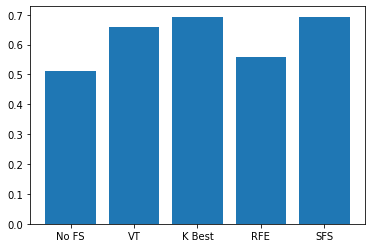

In [ ]:
import matplotlib.pyplot as plt

labels = ['No FS', 'VT', 'K Best', 'RFE', 'SFS']
accuracies = [
  no_fs_acc,
  vt_acc,
  kbest_acc,
  rfe_acc,
  sfs_acc
]
plt.bar(labels, accuracies)

plt.show()